In [90]:
import numpy as np
import pandas as pd

metadata_df = pd.read_csv('/content/test_metadata_rootclass.csv')
# Preprocessing the labels in metadata to ensure they are list objects and not strings
metadata_df['labels'] = metadata_df['labels'].apply(eval)
metadata_df['root_classes'] = metadata_df['root_classes'].apply(eval)
metadata_df = metadata_df[['labels', 'root_classes']]
metadata_df

,labels,root_classes
0,[Engine knocking],[Engine]
1,"[Toothbrush, Electric toothbrush]","[Domestic sounds, home sounds]"
2,"[Sine wave, Chirp tone]",[Other sourceless]
3,"[Fart, Buzz, Music]","[Wild animals, Digestive, Music, Onomatopoeia]"
4,"[Vehicle, Vehicle horn, car horn, honking, Tru...","[Alarm, Vehicle]"
...,...,...
21777,"[Propeller, airscrew]",[Vehicle]
21778,"[Speech, Buzzer]","[Alarm, Human voice]"
21779,"[Burping, eructation]",[Digestive]
21780,"[Percussion, Drum kit, Drum, Snare drum, Rimsh...",[Music]


In [18]:
mean_pooling_df = pd.read_csv('/content/test_embeddings_meanpool.csv')
mean_pooling_df = mean_pooling_df.drop(columns=['video_id'])
mean_pooling_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,64.9,221.3,85.4,7.4,215.8,123.5,89.7,58.7,102.3,129.8,...,124.0,191.2,144.8,65.8,87.1,153.0,112.2,216.3,187.1,173.0
1,93.7,112.2,100.1,20.7,166.8,153.3,93.8,114.8,160.3,164.4,...,54.9,181.4,106.5,192.7,50.5,67.4,95.2,123.9,190.5,132.4
2,170.6,72.8,107.5,83.9,118.0,103.7,150.8,213.0,187.7,170.2,...,96.5,204.1,215.9,80.7,77.4,20.7,80.1,190.3,42.6,146.3
3,170.6,118.4,102.6,128.2,134.6,115.3,83.7,27.1,207.9,192.5,...,120.7,27.1,137.5,150.0,90.3,94.5,100.1,136.5,156.4,119.3
4,73.9,166.3,82.6,17.5,230.2,55.8,187.4,137.7,132.2,146.5,...,91.4,149.5,149.7,134.8,124.3,62.7,146.1,166.0,52.4,85.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,59.7,189.7,13.3,18.3,179.3,130.6,225.9,48.1,124.6,123.8,...,255.0,214.7,253.7,112.6,123.7,90.4,110.9,138.4,58.5,113.1
21778,55.0,147.8,237.5,223.2,126.1,188.9,237.4,76.9,93.5,178.4,...,65.6,122.0,178.2,192.2,198.1,175.9,237.6,61.6,182.2,153.4
21779,82.0,77.8,171.4,86.6,112.6,113.1,68.8,99.3,167.5,153.7,...,147.6,129.8,32.3,148.6,101.8,54.0,85.2,107.8,183.9,112.1
21780,180.4,107.9,81.7,80.9,99.4,222.1,103.5,233.2,55.2,255.0,...,42.1,33.7,0.7,233.8,150.8,93.2,255.0,128.7,137.1,230.7


In [125]:
norm_mean_pooling_df = mean_pooling_df / 255.0
norm_mean_pooling_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,0.254510,0.867843,0.334902,0.029020,0.846275,0.484314,0.351765,0.230196,0.401176,0.509020,...,0.486275,0.749804,0.567843,0.258039,0.341569,0.600000,0.440000,0.848235,0.733725,0.678431
1,0.367451,0.440000,0.392549,0.081176,0.654118,0.601176,0.367843,0.450196,0.628627,0.644706,...,0.215294,0.711373,0.417647,0.755686,0.198039,0.264314,0.373333,0.485882,0.747059,0.519216
2,0.669020,0.285490,0.421569,0.329020,0.462745,0.406667,0.591373,0.835294,0.736078,0.667451,...,0.378431,0.800392,0.846667,0.316471,0.303529,0.081176,0.314118,0.746275,0.167059,0.573725
3,0.669020,0.464314,0.402353,0.502745,0.527843,0.452157,0.328235,0.106275,0.815294,0.754902,...,0.473333,0.106275,0.539216,0.588235,0.354118,0.370588,0.392549,0.535294,0.613333,0.467843
4,0.289804,0.652157,0.323922,0.068627,0.902745,0.218824,0.734902,0.540000,0.518431,0.574510,...,0.358431,0.586275,0.587059,0.528627,0.487451,0.245882,0.572941,0.650980,0.205490,0.336078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,0.234118,0.743922,0.052157,0.071765,0.703137,0.512157,0.885882,0.188627,0.488627,0.485490,...,1.000000,0.841961,0.994902,0.441569,0.485098,0.354510,0.434902,0.542745,0.229412,0.443529
21778,0.215686,0.579608,0.931373,0.875294,0.494510,0.740784,0.930980,0.301569,0.366667,0.699608,...,0.257255,0.478431,0.698824,0.753725,0.776863,0.689804,0.931765,0.241569,0.714510,0.601569
21779,0.321569,0.305098,0.672157,0.339608,0.441569,0.443529,0.269804,0.389412,0.656863,0.602745,...,0.578824,0.509020,0.126667,0.582745,0.399216,0.211765,0.334118,0.422745,0.721176,0.439608
21780,0.707451,0.423137,0.320392,0.317255,0.389804,0.870980,0.405882,0.914510,0.216471,1.000000,...,0.165098,0.132157,0.002745,0.916863,0.591373,0.365490,1.000000,0.504706,0.537647,0.904706


In [19]:
embeddings_df = pd.read_csv('/content/test_embeddings.csv')
embeddings_df = embeddings_df.drop(columns=['video_id'])
embeddings_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,132,228,153,42,232,96,32,75,131,148,...,118,255,29,89,0,0,65,185,255,222
1,80,123,108,0,156,196,88,125,144,152,...,46,255,93,222,0,0,3,185,155,118
2,170,81,97,86,108,72,153,231,179,152,...,167,168,154,0,121,113,142,212,50,187
3,181,113,129,155,154,153,175,9,255,157,...,0,62,116,150,0,50,93,0,143,0
4,38,199,5,0,246,64,198,115,51,124,...,51,150,101,61,56,0,95,255,0,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,59,189,0,13,174,153,248,58,127,133,...,255,255,255,34,117,56,255,255,60,103
21778,50,230,255,233,21,215,255,26,160,77,...,224,84,68,80,255,46,191,255,0,0
21779,23,105,204,22,146,166,70,164,184,140,...,0,145,0,111,105,133,47,141,13,174
21780,189,103,103,84,124,199,100,217,74,255,...,0,42,0,255,66,40,255,82,185,224


In [29]:
norm_embeddings_df = embeddings_df / 255.0
norm_embeddings_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_1270,feature_1271,feature_1272,feature_1273,feature_1274,feature_1275,feature_1276,feature_1277,feature_1278,feature_1279
0,0.517647,0.894118,0.600000,0.164706,0.909804,0.376471,0.125490,0.294118,0.513725,0.580392,...,0.462745,1.000000,0.113725,0.349020,0.000000,0.000000,0.254902,0.725490,1.000000,0.870588
1,0.313725,0.482353,0.423529,0.000000,0.611765,0.768627,0.345098,0.490196,0.564706,0.596078,...,0.180392,1.000000,0.364706,0.870588,0.000000,0.000000,0.011765,0.725490,0.607843,0.462745
2,0.666667,0.317647,0.380392,0.337255,0.423529,0.282353,0.600000,0.905882,0.701961,0.596078,...,0.654902,0.658824,0.603922,0.000000,0.474510,0.443137,0.556863,0.831373,0.196078,0.733333
3,0.709804,0.443137,0.505882,0.607843,0.603922,0.600000,0.686275,0.035294,1.000000,0.615686,...,0.000000,0.243137,0.454902,0.588235,0.000000,0.196078,0.364706,0.000000,0.560784,0.000000
4,0.149020,0.780392,0.019608,0.000000,0.964706,0.250980,0.776471,0.450980,0.200000,0.486275,...,0.200000,0.588235,0.396078,0.239216,0.219608,0.000000,0.372549,1.000000,0.000000,0.380392
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,0.231373,0.741176,0.000000,0.050980,0.682353,0.600000,0.972549,0.227451,0.498039,0.521569,...,1.000000,1.000000,1.000000,0.133333,0.458824,0.219608,1.000000,1.000000,0.235294,0.403922
21778,0.196078,0.901961,1.000000,0.913725,0.082353,0.843137,1.000000,0.101961,0.627451,0.301961,...,0.878431,0.329412,0.266667,0.313725,1.000000,0.180392,0.749020,1.000000,0.000000,0.000000
21779,0.090196,0.411765,0.800000,0.086275,0.572549,0.650980,0.274510,0.643137,0.721569,0.549020,...,0.000000,0.568627,0.000000,0.435294,0.411765,0.521569,0.184314,0.552941,0.050980,0.682353
21780,0.741176,0.403922,0.403922,0.329412,0.486275,0.780392,0.392157,0.850980,0.290196,1.000000,...,0.000000,0.164706,0.000000,1.000000,0.258824,0.156863,1.000000,0.321569,0.725490,0.878431


In [4]:
from sklearn.model_selection import train_test_split

# Generate a list of indices and split these indices into training and testing sets
indices = range(len(metadata_df))
train_indices, test_indices = train_test_split(indices, test_size=0.1, random_state=42)

In [94]:
# Separate the embeddings (features) and labels for training
self_labels = metadata_df['labels']
root_labels = metadata_df['root_classes']
train_self_labels, test_self_labels = self_labels.iloc[train_indices].values, self_labels.iloc[test_indices].values
train_root_labels, test_root_labels = root_labels.iloc[train_indices].values, root_labels.iloc[test_indices].values
train_mean_pool, test_mean_pool = mean_pooling_df.iloc[train_indices].values, mean_pooling_df.iloc[test_indices].values
train_norm_meanpool, test_norm_meanpool = norm_mean_pooling_df.iloc[train_indices].values, norm_mean_pooling_df.iloc[test_indices].values
train_flatten_emb, test_flatten_emb = embeddings_df.iloc[train_indices].values, embeddings_df.iloc[test_indices].values
train_norm_flattenemb, test_norm_flattenemb = norm_embeddings_df.iloc[train_indices].values, norm_embeddings_df.iloc[test_indices].values

In [62]:
from sklearn.neighbors import KDTree

# Build KDTrees for the training embeddings
meanpool_kdtree = KDTree(train_mean_pool, leaf_size=40, metric='euclidean')
norm_meanpool_kdtree = KDTree(train_norm_meanpool, leaf_size=40, metric='euclidean')
flatten_kdtree = KDTree(train_flatten_emb, leaf_size=40, metric='euclidean')
norm_flatten_kdtree = KDTree(train_norm_flattenemb, leaf_size=40, metric='euclidean')

methods = ['meanpool', 'norm_meanpool', 'flatten', 'norm_flatten']
models = [meanpool_kdtree, norm_meanpool_kdtree, flatten_kdtree, norm_flatten_kdtree]
training_data = [train_mean_pool, train_norm_meanpool, train_flatten_emb, train_norm_flattenemb]
testing_data = [test_mean_pool, test_norm_meanpool, test_flatten_emb, test_norm_flattenemb]
data_log = {}
for method, model, train, test in zip(methods, models, training_data, testing_data):
  data_log[method] = {}
  data_log[method]['model'] = model
  data_log[method]['train'] = train
  data_log[method]['test'] = test

In [100]:
# query the KDTree
for method in methods:
  for k in {10, 50, 100}:
    print(f'querying with method {method} at top {k}')
    distances, indices = data_log[method]['model'].query(data_log[method]['test'], k=k)
    self_key, root_key = 'self' + str(k), 'root' + str(k)
    data_log[method][self_key] = train_self_labels[indices]
    data_log[method][root_key] = train_root_labels[indices]

querying with method meanpool at top 10
querying with method meanpool at top 100
querying with method meanpool at top 50
querying with method norm_meanpool at top 10
querying with method norm_meanpool at top 100
querying with method norm_meanpool at top 50
querying with method flatten at top 10
querying with method flatten at top 100
querying with method flatten at top 50
querying with method norm_flatten at top 10
querying with method norm_flatten at top 100
querying with method norm_flatten at top 50


In [104]:
# calculate precision@K
def cal_precisionK(query, neighbors):
  query_labels = set(query)
  relevant_cnt = 0
  for neigh in neighbors:
    neighbor_labels = set(neigh)
    if not query_labels.isdisjoint(neighbor_labels):
      relevant_cnt += 1
  return relevant_cnt / len(neighbors)

In [102]:
# calculate overall precision@K
def overall_precision(test_labels, results_labels):
  sum = 0
  for query, neighbors in zip(test_labels, results_labels):
    precision = cal_precisionK(query, neighbors)
    sum += precision
  overall_precision = sum / len(test_labels)
  return overall_precision

In [105]:
for method in methods:
  print('Evaluating method:', method)
  for k in {10, 50, 100}:
    self_key, root_key = 'self' + str(k), 'root' + str(k)
    self_results, root_results = data_log[method][self_key], data_log[method][root_key]
    self_precision = overall_precision(test_self_labels, self_results)
    root_precision = overall_precision(test_root_labels, root_results)
    data_log[method][f'self_precision_{k}'], data_log[method][f'root_precision_{k}'] = self_precision, root_precision
    print(f'self class precision @{k} is {self_precision}')
    print(f'root class precision @{k} is {root_precision}')

Evaluating method: meanpool
self class precision @10 is 0.4315741165672335
root class precision @10 is 0.6373565855897202
self class precision @100 is 0.36720972923359196
root class precision @100 is 0.5837861404313911
self class precision @50 is 0.3922257916475431
root class precision @50 is 0.6040293712712264
Evaluating method: norm_meanpool
self class precision @10 is 0.4315741165672335
root class precision @10 is 0.6373565855897202
self class precision @100 is 0.36720972923359196
root class precision @100 is 0.5837861404313911
self class precision @50 is 0.3922257916475431
root class precision @50 is 0.6040293712712264
Evaluating method: flatten
self class precision @10 is 0.27540156034878455
root class precision @10 is 0.46016521340064426
self class precision @100 is 0.23253786140431262
root class precision @100 is 0.4173336392840746
self class precision @50 is 0.24068838916934449
root class precision @50 is 0.4264708581918305
Evaluating method: norm_flatten
self class precision @

In [109]:
from sklearn.decomposition import PCA

N = 128
pca = PCA(n_components=N)

# Fit PCA on the training data and transform both training and testing data
train_pca = pca.fit_transform(train_flatten_emb)
test_pca = pca.transform(test_flatten_emb)

data_log['pca10_unnorm'] = {}
data_log['pca10_unnorm']['pca'] = pca
data_log['pca10_unnorm']['model'] = KDTree(train_pca, leaf_size=40, metric='euclidean')
for k in (10, 50, 100):
  distances, indices = data_log['pca10_unnorm']['model'].query(test_pca, k=k)
  self_results = train_self_labels[indices]
  root_results = train_root_labels[indices]
  self_precision = overall_precision(test_self_labels, self_results)
  root_precision = overall_precision(test_root_labels, root_results)
  data_log['pca10_unnorm'][f'self_precision_{k}'] = self_precision
  data_log['pca10_unnorm'][f'root_precision_{k}'] = root_precision
  print(f'self class precision @{k} is {self_precision}')
  print(f'root class precision @{k} is {root_precision}')

self class precision @10 is 0.42817806333180475
root class precision @10 is 0.6328132170720511
self class precision @50 is 0.38511243689765795
root class precision @50 is 0.5978889398806838
self class precision @100 is 0.3589490592014668
root class precision @100 is 0.5749426342358884


In [107]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(train_flatten_emb)

# Transform both the training and test data
train_scaled = scaler.transform(train_flatten_emb)
test_scaled = scaler.transform(test_flatten_emb)

N = 128
pca = PCA(n_components=N)

# Fit PCA on the training data and transform both training and testing data
train_scaled_pca = pca.fit_transform(train_scaled)
test_scaled_pca = pca.transform(test_scaled)

data_log['pca10_standard'] = {}
data_log['pca10_standard']['pca'] = pca
data_log['pca10_standard']['model'] = KDTree(train_scaled_pca, leaf_size=40, metric='euclidean')
for k in (10, 50, 100):
  distances, indices = data_log['pca10_standard']['model'].query(test_scaled_pca, k=k)
  self_results = train_self_labels[indices]
  root_results = train_root_labels[indices]
  self_precision = overall_precision(test_self_labels, self_results)
  root_precision = overall_precision(test_root_labels, root_results)
  data_log['pca10_standard'][f'self_precision_{k}'] = self_precision
  data_log['pca10_standard'][f'root_precision_{k}'] = root_precision
  print(f'self class precision @{k} is {self_precision}')
  print(f'root class precision @{k} is {root_precision}')

self class precision @10 is 0.43685176686553445
root class precision @10 is 0.6418540614960998
self class precision @50 is 0.395603487838456
root class precision @50 is 0.6093253786140468
self class precision @100 is 0.37419917393299534
root class precision @100 is 0.5930197338228563


In [108]:
# Compare standard scaler with min max scaler
train_minmax, test_minmax = train_norm_flattenemb, test_norm_flattenemb

N = 128
pca = PCA(n_components=N)

train_minmax_pca = pca.fit_transform(train_minmax)
test_minmax_pca = pca.transform(test_minmax)

data_log['pca10_minmax'] = {}
data_log['pca10_minmax']['pca'] = pca
data_log['pca10_minmax']['model'] = KDTree(train_minmax_pca, leaf_size=40, metric='euclidean')
for k in (10, 50, 100):
  distances, indices = data_log['pca10_minmax']['model'].query(test_minmax_pca, k=k)
  self_results = train_self_labels[indices]
  root_results = train_root_labels[indices]
  self_precision = overall_precision(test_self_labels, self_results)
  root_precision = overall_precision(test_root_labels, root_results)
  data_log['pca10_minmax'][f'self_precision_{k}'] = self_precision
  data_log['pca10_minmax'][f'root_precision_{k}'] = root_precision
  print(f'self class precision @{k} is {self_precision}')
  print(f'root class precision @{k} is {root_precision}')

self class precision @10 is 0.4319412574575504
root class precision @10 is 0.6369894446994042
self class precision @50 is 0.38558054153281185
root class precision @50 is 0.5978522257916504
self class precision @100 is 0.35945846718678176
root class precision @100 is 0.5754887563102353


In [124]:
methods = ['norm_meanpool', 'norm_flatten', 'pca10_standard', 'pca10_minmax']
summary_table = {
    'Method/Precision': methods,
    'Precison@10 (detailed) (%)': [round(data_log[method]['self_precision_10'], 3) * 100 for method in methods],
    'Precison@10 (root) (%)': [round(data_log[method]['root_precision_10'], 3) * 100 for method in methods],
    'Precison@50 (detailed) (%)': [round(data_log[method]['self_precision_50'], 3) * 100 for method in methods],
    'Precison@50 (root) (%)': [round(data_log[method]['root_precision_50'], 3) * 100 for method in methods],
    'Precison@100 (detailed) (%)': [round(data_log[method]['self_precision_100'], 3) * 100 for method in methods],
    'Precison@100 (root) (%)': [round(data_log[method]['root_precision_100'], 3) * 100 for method in methods]
}

summary_df = pd.DataFrame(summary_table)
summary_df

,Method/Precision,Precison@10 (detailed) (%),Precison@10 (root) (%),Precison@50 (detailed) (%),Precison@50 (root) (%),Precison@100 (detailed) (%),Precison@100 (root) (%)
0,norm_meanpool,43.2,63.7,39.2,60.4,36.7,58.4
1,norm_flatten,27.5,46.0,24.1,42.6,23.3,41.7
2,pca10_standard,43.7,64.2,39.6,60.9,37.4,59.3
3,pca10_minmax,43.2,63.7,38.6,59.8,35.9,57.5


In [114]:
pca = PCA(n_components=1280)

# Fit PCA on the training data and transform both training and testing data
train_scaled_pca = pca.fit_transform(train_scaled)
test_scaled_pca = pca.transform(test_scaled)

# Variance explained by each component
print("Variance explained by each component:", pca.explained_variance_ratio_)

# Cumulative variance explained
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative variance explained:", cumulative_variance)

Variance explained by each component: [2.08023637e-02 1.90595014e-02 1.49359988e-02 ... 4.23492198e-05
 3.96208559e-05 3.89611636e-05]
Cumulative variance explained: [0.02080236 0.03986187 0.05479786 ... 0.99992142 0.99996104 1.        ]


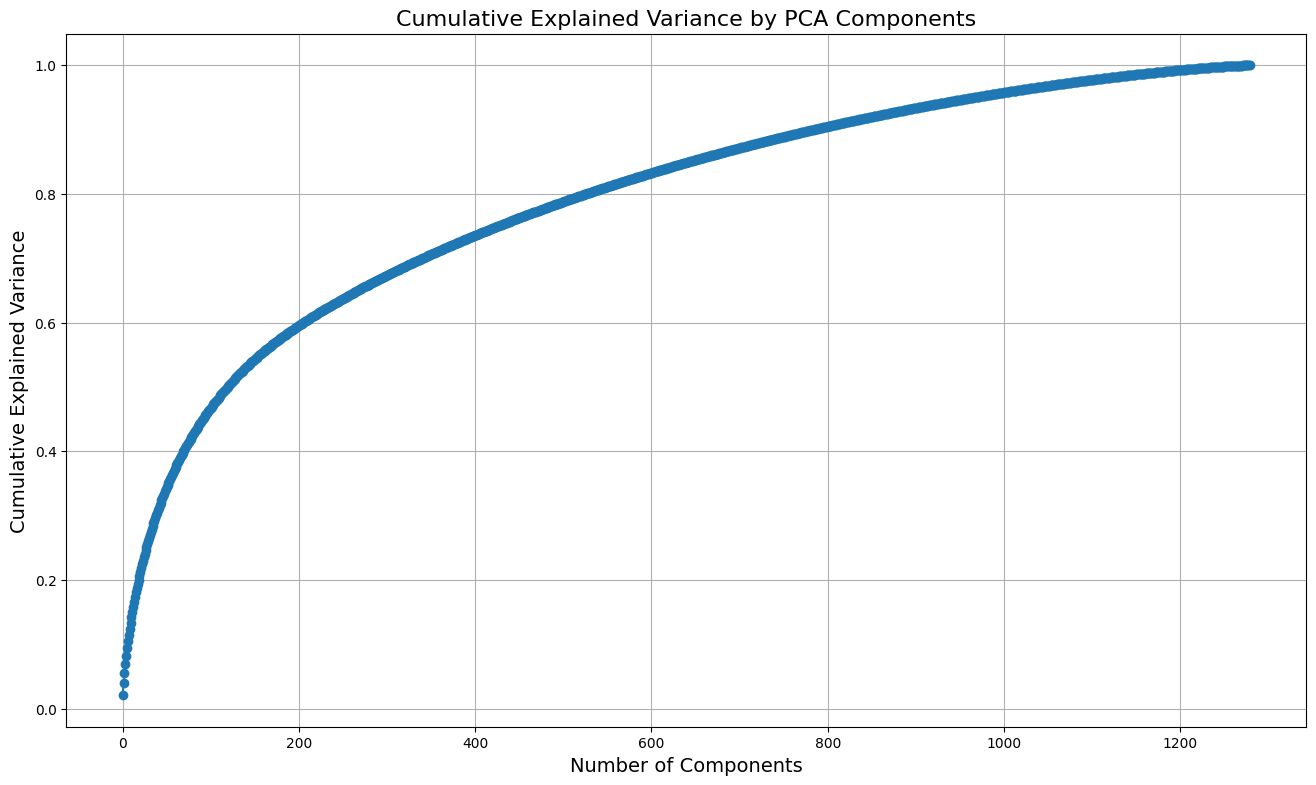

In [115]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)
plt.title('Cumulative Explained Variance by PCA Components', fontsize=16)
plt.grid(True)
plt.show()

In [116]:
from sklearn.decomposition import PCA

percentages = [0.1, 0.3, 0.5, 0.7, 0.9]
precision_pca = {}

for percentage in percentages:
  n_components = int(1280 * percentage)
  pca = PCA(n_components=n_components)

  print(f'performing PCA with {percentage * 100}% remaining features')

  # Fit PCA on the training data and transform both training and testing data
  features_train_pca = pca.fit_transform(train_scaled)
  features_test_pca = pca.transform(test_scaled)

  kd_tree = KDTree(features_train_pca, leaf_size=40, metric='euclidean')
  distances, indices = kd_tree.query(features_test_pca, k=10)
  root_results = train_root_labels[indices]
  root_precision = overall_precision(test_root_labels, root_results)
  precision_pca[percentage] = root_precision
  print(f'precision after PCA: {root_precision}')

performing PCA with 10.0% remaining features
precision after PCA: 0.6413492427719143
performing PCA with 30.0% remaining features
precision after PCA: 0.6179440110142276
performing PCA with 50.0% remaining features
precision after PCA: 0.5753097751262052
performing PCA with 70.0% remaining features
precision after PCA: 0.5403854979348329
performing PCA with 90.0% remaining features
precision after PCA: 0.5145020651675082


In [118]:
# Investigate less dimensions
percentages = [0.02, 0.04, 0.06, 0.08]

for percentage in percentages:
  n_components = int(1280 * percentage)
  pca = PCA(n_components=n_components)

  print(f'performing PCA with {percentage * 100}% remaining features')
  # Fit PCA on the training data and transform both training and testing data
  features_train_pca = pca.fit_transform(train_scaled)
  features_test_pca = pca.transform(test_scaled)

  kd_tree = KDTree(features_train_pca, leaf_size=40, metric='euclidean')
  distances, indices = kd_tree.query(features_test_pca, k=10)
  root_results = train_root_labels[indices]
  root_precision = overall_precision(test_root_labels, root_results)
  precision_pca[percentage] = root_precision
  print(f'precision after PCA: {root_precision}')

performing PCA with 2.0% remaining features
precision after PCA: 0.6416245984396515
performing PCA with 4.0% remaining features
precision after PCA: 0.6439192290041317
performing PCA with 6.0% remaining features
precision after PCA: 0.6404313905461229
performing PCA with 8.0% remaining features
precision after PCA: 0.6434144102799462


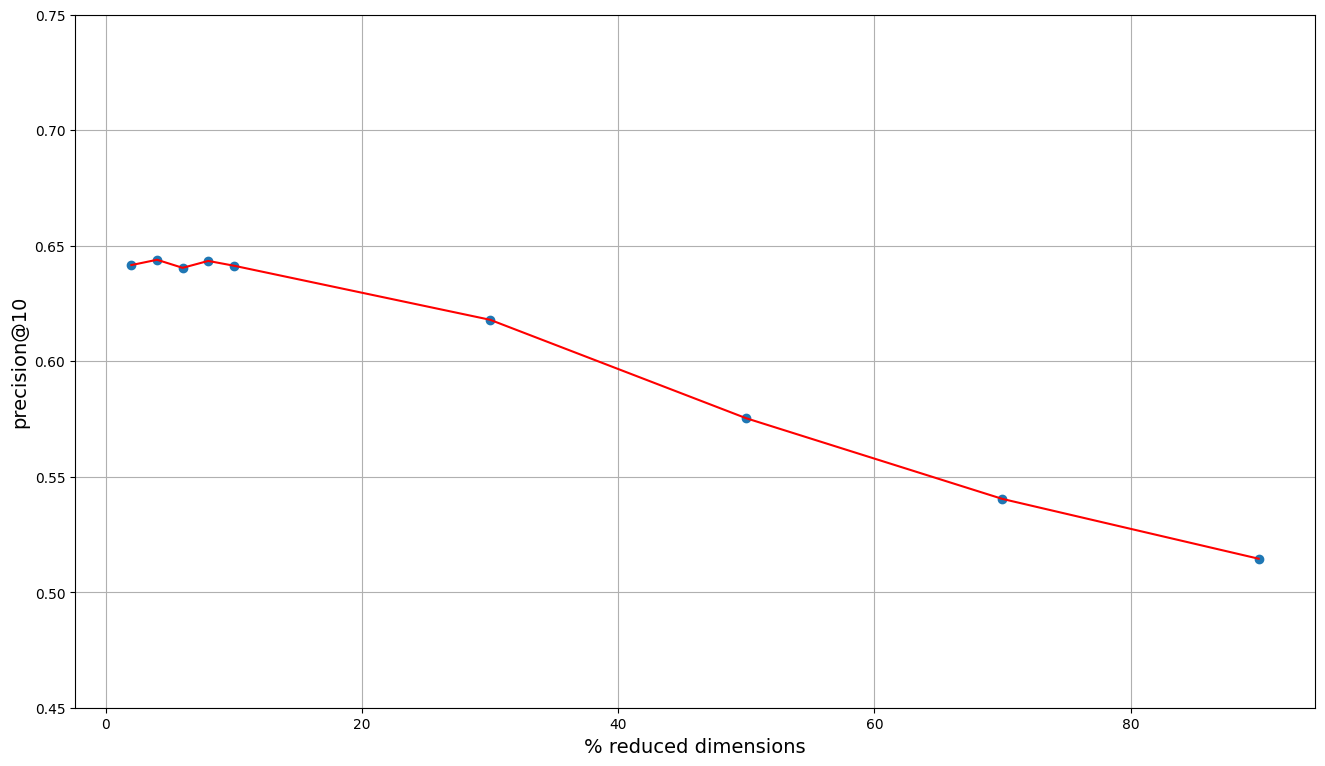

In [123]:
import matplotlib.pyplot as plt

keys_sorted = sorted(precision_pca.keys())
values_sorted = [precision_pca[key] for key in keys_sorted]

x = np.array(keys_sorted) * 100
y = np.array(values_sorted)

plt.figure(figsize=(16, 9))
plt.scatter(x, y)
plt.plot(x, y, color='red')
plt.xlabel('% reduced dimensions', fontsize=14)
plt.ylabel('precision@10', fontsize=14)
plt.ylim(0.45, 0.75)
plt.grid(True)
plt.savefig('PCA.pdf')
plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KDTree

dimension = 128
pca = PCA(n_components=dimension)

# Fit PCA on the training data and transform both training and testing data
features_pca = pca.fit_transform(features)
features_pca.shape

(21782, 128)

In [ ]:
features_pca_df = pd.DataFrame(features_pca)
features_pca_df.insert(0, 'video_id', video_ids)
features_pca_df

,video_id,0,1,2,3,4,5,6,7,8,...,118,119,120,121,122,123,124,125,126,127
0,wqoOX8K8DEU,-400.109260,-257.628675,-777.372164,-429.732838,621.198216,1010.863520,-740.583021,-823.286543,756.070759,...,-5.900869,17.375066,99.691431,-102.292165,66.364796,-80.286388,9.450293,73.487642,-110.601367,11.380997
1,wqH6Sj_h948,309.743991,364.795850,316.434703,-371.238257,-22.975099,-83.556422,-41.923027,76.683524,57.180570,...,10.775449,150.853976,110.909377,122.079984,-105.817719,54.137357,-15.539122,-9.302987,39.779985,-71.267268
2,wq1098my4zA,-3.724927,-193.261449,-17.087173,26.256569,-404.693084,-141.886639,269.344193,58.480854,-80.268385,...,86.424756,-33.846825,14.611483,-25.802075,-97.903874,-173.243493,35.553446,-100.313310,-49.678220,-7.799251
3,wqR7LHho-WE,-418.146599,267.529262,-541.747968,-51.991742,-55.635861,28.132081,-271.842801,-40.179547,105.100204,...,-38.855125,151.780249,-32.800451,-23.925573,175.564882,21.768738,-136.050821,-14.515413,99.665047,-23.902176
4,wq6Me-UUbSc,379.515666,-52.399000,231.587451,-466.958225,-173.884894,175.311860,-297.646045,-388.664204,-139.089319,...,-37.760027,-42.505700,-59.882969,74.903153,-79.236462,35.281720,8.187346,27.899158,-48.208623,-16.929791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,2w6tV5kDGWo,-278.272520,-135.420555,-160.300365,279.512398,211.721292,9.691480,267.252515,293.082245,256.616713,...,-10.694947,40.897360,74.729487,-139.661727,219.048316,17.298801,-294.274324,34.531652,-213.691394,156.890210
21778,2wZCoeq9Ppc,-542.904607,-120.449937,-166.862126,190.139568,573.741848,300.358090,147.170225,-591.859061,401.577402,...,314.729477,81.256518,19.561297,125.557357,-8.983319,-181.315607,-234.570156,-45.757992,238.502280,172.396681
21779,2wajg-UP-Gs,-288.657092,-100.138103,118.244063,-119.342686,103.193825,-63.302329,-284.782229,139.615884,3.247217,...,26.585970,-68.645850,-23.018849,-83.977738,-71.372993,-28.418992,109.285442,35.489296,-113.680845,153.604656
21780,lZavPVn7O4Q,-134.415737,-60.303461,-44.512551,-62.570279,-269.720770,-16.318829,262.626449,-121.819326,-25.775420,...,163.201576,-45.260604,-72.487915,-40.781930,-193.022881,-26.643103,23.292939,44.642550,-33.148183,8.248720


In [ ]:
import joblib
joblib.dump(pca, 'pca_model.pkl')
features_pca_df.to_csv('training_reduced_embeddings.csv', index=False)

In [ ]:
from google.colab import files


files.download('/content/pca_model.pkl')
files.download('/content/training_reduced_embeddings.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [127]:
mean_pooling_df = pd.read_csv('/content/test_embeddings_meanpool.csv')
video_id = mean_pooling_df['video_id']
mean_pooling_df.drop('video_id', axis=1, inplace=True)
normalized_mean_pooling = mean_pooling_df / 255.0
normalized_mean_pooling['video_id'] = video_id
cols = ['video_id'] + [col for col in normalized_mean_pooling if col != 'video_id']
normalized_mean_pooling = normalized_mean_pooling[cols]
normalized_mean_pooling

,video_id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127
0,iZcPr3wgJCw,0.254510,0.867843,0.334902,0.029020,0.846275,0.484314,0.351765,0.230196,0.401176,...,0.486275,0.749804,0.567843,0.258039,0.341569,0.600000,0.440000,0.848235,0.733725,0.678431
1,iZmn0dUXP9E,0.367451,0.440000,0.392549,0.081176,0.654118,0.601176,0.367843,0.450196,0.628627,...,0.215294,0.711373,0.417647,0.755686,0.198039,0.264314,0.373333,0.485882,0.747059,0.519216
2,iZ2K_GPtc6g,0.669020,0.285490,0.421569,0.329020,0.462745,0.406667,0.591373,0.835294,0.736078,...,0.378431,0.800392,0.846667,0.316471,0.303529,0.081176,0.314118,0.746275,0.167059,0.573725
3,iZtF1lUPbEQ,0.669020,0.464314,0.402353,0.502745,0.527843,0.452157,0.328235,0.106275,0.815294,...,0.473333,0.106275,0.539216,0.588235,0.354118,0.370588,0.392549,0.535294,0.613333,0.467843
4,iZFRfh1Wjt8,0.289804,0.652157,0.323922,0.068627,0.902745,0.218824,0.734902,0.540000,0.518431,...,0.358431,0.586275,0.587059,0.528627,0.487451,0.245882,0.572941,0.650980,0.205490,0.336078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21777,2Cmn2lplGfc,0.234118,0.743922,0.052157,0.071765,0.703137,0.512157,0.885882,0.188627,0.488627,...,1.000000,0.841961,0.994902,0.441569,0.485098,0.354510,0.434902,0.542745,0.229412,0.443529
21778,2ClQcAd-wJg,0.215686,0.579608,0.931373,0.875294,0.494510,0.740784,0.930980,0.301569,0.366667,...,0.257255,0.478431,0.698824,0.753725,0.776863,0.689804,0.931765,0.241569,0.714510,0.601569
21779,-Sclnq22t7o,0.321569,0.305098,0.672157,0.339608,0.441569,0.443529,0.269804,0.389412,0.656863,...,0.578824,0.509020,0.126667,0.582745,0.399216,0.211765,0.334118,0.422745,0.721176,0.439608
21780,-SD9DkKyOrY,0.707451,0.423137,0.320392,0.317255,0.389804,0.870980,0.405882,0.914510,0.216471,...,0.165098,0.132157,0.002745,0.916863,0.591373,0.365490,1.000000,0.504706,0.537647,0.904706


In [128]:
normalized_mean_pooling.to_csv('test_normalized_meanpooling.csv', index=False)

from google.colab import files
files.download('/content/test_normalized_meanpooling.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>